In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Load the preprocessed data
df = pd.read_csv('/content/sample_data/hEART_dISEASSE.csv', index_col=0)  # Assuming index was saved

# 2. Split into features and target
X = df.drop('num', axis=1)
y = df['num']

In [6]:
df.isnull().sum()

,0
trestbps,0
chol,0
thalach,0
oldpeak,0
ca,0
num,0
sex_1,0
cp_2,0
cp_3,0
cp_4,0


In [7]:
pca = PCA()
X_pca = pca.fit_transform(X)


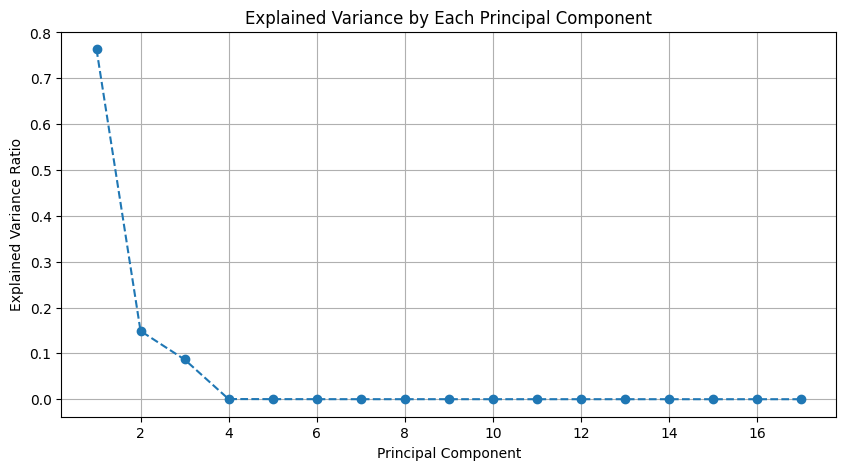

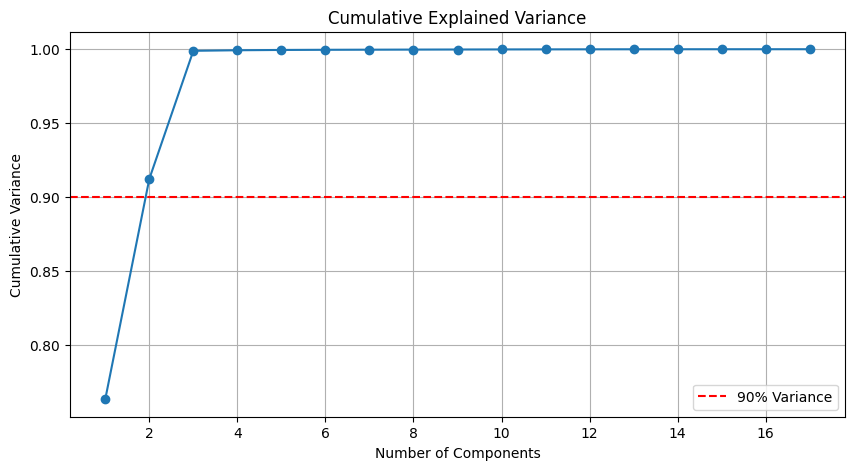

In [9]:
#plot results
import matplotlib.pyplot as plt

# Explained variance ratio plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_,
         marker='o', linestyle='--')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Cumulative variance plot
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.legend()
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Covariance matrix of transposed (features on rows)
cov_matrix = np.cov(X_scaled.T)

# Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Optional: Sort eigenvalues and eigenvectors
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]
print(eigenvalues)

[3.26642544 1.55539752 1.42597512 1.34692579 1.31968958 1.21040841
 0.99343289 0.9046386  0.85119141 0.79445121 0.74939257 0.70840091
 0.58644888 0.52634091 0.40913608 0.29876192 0.11041518]


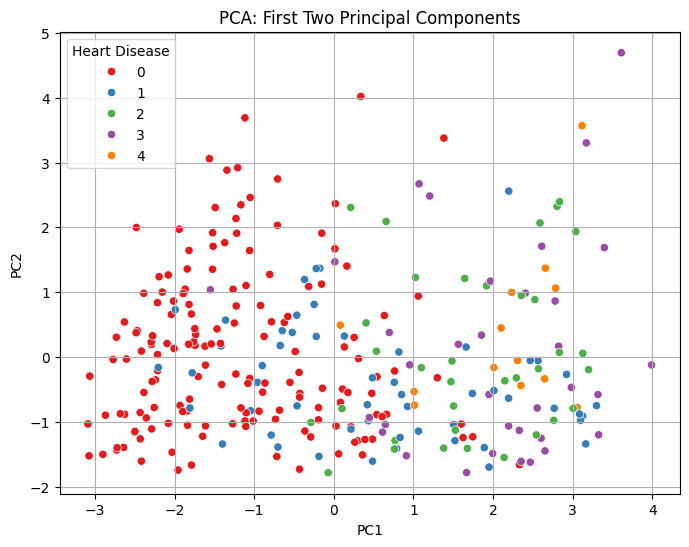

In [14]:
# Reduce to 2D for plotting
import seaborn as sns
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette='Set1')
plt.title('PCA: First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Heart Disease')
plt.grid(True)
plt.show()
